### Importing Required Libraries

In [1]:
## Importing Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use("dark_background")

### Loading Dataset

In [2]:
## Loading Dataset

df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Data Cleaning 

In [3]:
df.shape # (rows,columns)

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
## Dropping Unnecessary Columns 
df = df.drop(["url" , "address" , "phone" , "menu_item" , "reviews_list" , "dish_liked"] , axis = 1)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [8]:
## Removing Duplicate values 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [9]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

In [10]:
## Checking for null values
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7755
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [11]:
null_values = df.isnull().sum()
## Total Null Values
null_values.sum()

np.int64(8392)

In [12]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
## Removing "NEW" , "/5" , "-" from rate column 
def handle_rate(value):
    if(value == "NEW" or value == "-") :
        return np.nan # null value
    else :
        value = str(value).split("/5") # converted to list 
        value = value[0]
        return float(value)
    
df["rate"] = df["rate"].apply(handle_rate)
df["rate"].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
## Filling null values with mean in rate column 
df["rate"].fillna(df["rate"].mean(),inplace = True)

C:\Users\sahan\AppData\Local\Temp\ipykernel_8208\1290822995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rate"].fillna(df["rate"].mean(),inplace = True)


In [15]:
df["rate"].isnull().sum()  ## NO null values 

np.int64(0)

In [16]:
## Dropping Null Values 
df.dropna(inplace = True)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [17]:
## Now our data is completely clean with no null values 

In [18]:
## Renaming Columns 
df.rename(columns = {"approx_cost(for two people)" : "Cost_2_plates" , "listed_in(type)" : "Type"}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_2_plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [19]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [20]:
df["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [21]:
# location and listed_in(city) contains similar values so we are dropping one column 
df.drop("listed_in(city)" , axis = 1 , inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_2_plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [22]:
df["Cost_2_plates"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [23]:
## Remove "," from Cost_2_plates column 
def handle_comma(value):
    value = str(value)
    if ("," in value):
        value = value.replace(",","")
        return float(value)
    else :
        return float(value)
df["Cost_2_plates"] = df["Cost_2_plates"].apply(handle_comma)
df["Cost_2_plates"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [24]:
rest_types = df["rest_type"].value_counts()
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [25]:
rest_types_less_than_1000 = rest_types[rest_types < 1000]
rest_types_less_than_1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: count, Length: 85, dtype: int64

In [26]:
## making rest_types less than 1000 in frequency as others 
def handle_rest_type(value):
    if(value in rest_types_less_than_1000):
        return "others"
    else :
        return value 

df["rest_type"] = df["rest_type"].apply(handle_rest_type)
df["rest_type"].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [27]:
## Cleaning location column '
location = df["location"].value_counts(ascending = False)
location

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [28]:
location_less_than_300 = location[location < 300]
location_less_than_300

location
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Kumaraswamy Layout               191
Thippasandra                     191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
RT Nagar                          78
Vijay Nagar                  

In [29]:
def handle_loc(value):
    if(value in location_less_than_300):
        return "others"
    else :
        return value

df["location"] = df["location"].apply(handle_loc)
df["location"].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [30]:
## Cleaning Cuisines column 
cuisines = df["cuisines"].value_counts()
cuisines

cuisines
North Indian                               2852
North Indian, Chinese                      2351
South Indian                               1820
Biryani                                     903
Bakery, Desserts                            898
                                           ... 
Italian, North Indian, Continental, BBQ       1
Tibetan, Nepalese                             1
North Indian, Street Food, Biryani            1
Chinese, Mughlai                              1
North Indian, Chinese, Arabian, Momos         1
Name: count, Length: 2704, dtype: int64

In [31]:
cuisines_less_than_100 = cuisines[cuisines < 100]
cuisines_less_than_100

cuisines
North Indian, Continental, Chinese         97
Juices                                     94
Fast Food, North Indian                    93
Bengali, North Indian                      93
Tibetan, Momos                             90
                                           ..
Italian, North Indian, Continental, BBQ     1
Tibetan, Nepalese                           1
North Indian, Street Food, Biryani          1
Chinese, Mughlai                            1
North Indian, Chinese, Arabian, Momos       1
Name: count, Length: 2635, dtype: int64

In [32]:
def handle_cuisines(value):
    if(value in cuisines_less_than_100):
        return "others"
    else :
        return value
    
df["cuisines"] = df["cuisines"].apply(handle_cuisines)
df["cuisines"].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [33]:
df["Type"].value_counts()
## Data is already clean , no need to cluster this data 

Type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

In [34]:
## Data is completely Cleaned 

### Data Analysis and Visualization

#### Visualizing Restaurants count at various locations 

In [35]:
df["location"]

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Basavanagudi
             ...     
51712      Whitefield
51713      Whitefield
51714      Whitefield
51715          others
51716          others
Name: location, Length: 51042, dtype: object

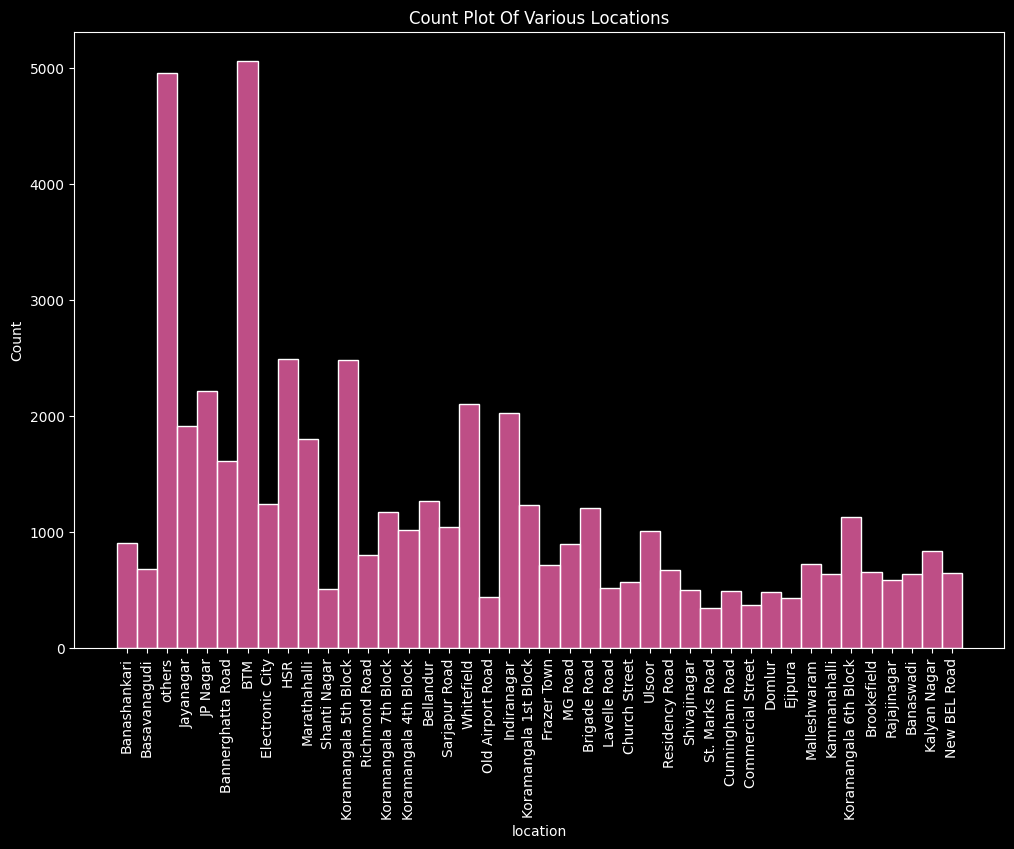

In [36]:
plt.figure(figsize = (12,8))
sns.histplot(df["location"],color="hotpink",edgecolor = "white")
plt.xticks(rotation = 90) # x axis values are rotated by 90 degrees 
plt.title("Count Plot Of Various Locations")
plt.show()


##### Interpretation :  Most of the Restaurants" are at location "BTM" , so it is good to open new restaurants at location such as "Old Airport Road" , "St. Marks road" ,etc, where there are only few restaurants.

#### Visualizing Restaurants offers/not offers Online Order facility

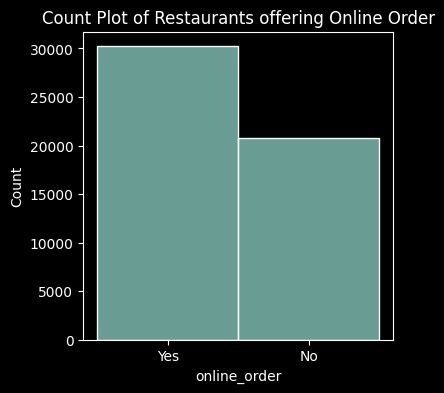

In [37]:
## Visualizing Online Order
plt.figure(figsize=(4,4))
sns.histplot(df["online_order"])
plt.title("Count Plot of Restaurants offering Online Order")
plt.show()

##### Interpretation : Most of the restaurants supports online order facility , i.e approx 30000

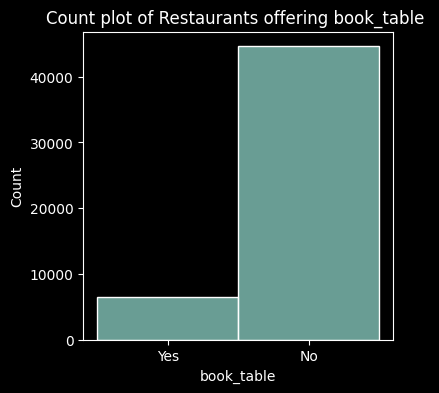

In [38]:
# Visualizing book table 
import seaborn as sns
plt.figure(figsize=(4,4))
sns.histplot(df["book_table"] )
plt.title("Count plot of Restaurants offering book_table " )
plt.show()

##### Interpretation :  Most of the restaurants doesn't offers book table facility , i.e approx 40000

#### Visualizing Online Order facility v/s rate(rating)

Text(0.5, 1.0, 'Box Plot of Online Order v/s rating')

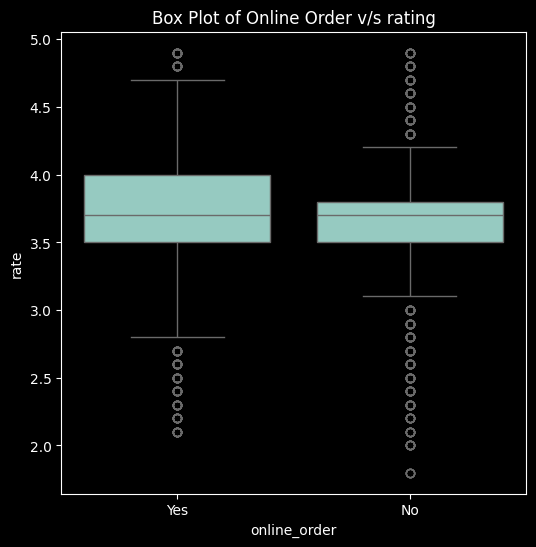

In [39]:
## Visualizing Online Order v/s rate 
plt.figure(figsize=(6,6))
sns.boxplot(x = "online_order" , y = "rate" , data = df)
plt.title("Box Plot of Online Order v/s rating")

##### Interpretation : 
##### The restaurants those who are offering online order facility having highest rating of "4.8" while restaurants doesn't offering online order facility have highest rating of "4.2"
##### The restaurants those who are offering online order facility having average rating of "3.7" which is same for the restaurants doesn't offering online order facility 
##### The restaurants those who are offering online order facility having lowest rating of "2.8" while restaurants doesn't offering online order facility have lowest rating of "3.1"
##### Since average rating of restaurants offering / not offering online facility is same 

#### Visualizing book table facility v/s rate (rating)

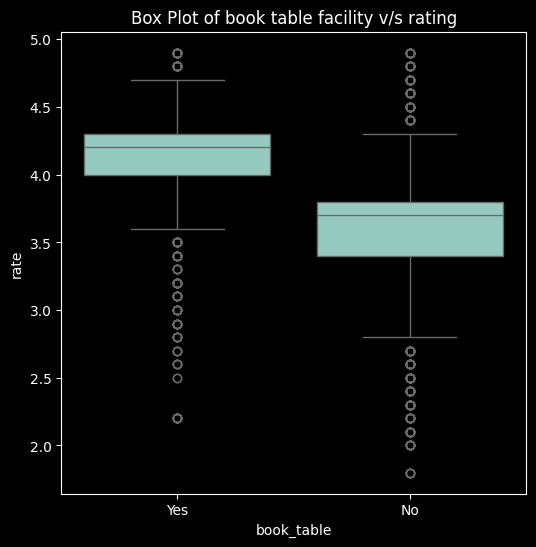

In [40]:
## Visualizing book table facility v/s rate (rating)
plt.figure(figsize=(6,6))
sns.boxplot(x = "book_table" , y = "rate" , data = df)
plt.title("Box Plot of book table facility v/s rating")
plt.show()

##### Interpretation : Average rating of the restaurants offering book table facility is higher as compared to the restaurants doesn't offering book table facility , so for the profit of restaurants they should offer book table facility. 

#### Visualizing restaurants offering online order facility Location wise

In [41]:
## Visualizing online order facility Location wise 
df1 = df.groupby(["location","online_order"])["name"].count()
df1.to_csv("location_online.csv")
df1 = pd.read_csv("location_online.csv")

In [42]:
df1 = pd.pivot_table(df1 ,values = None , index = ["location"] , columns = ["online_order"]  , aggfunc = np.sum)
df1

C:\Users\sahan\AppData\Local\Temp\ipykernel_8208\1736206732.py:1: FutureWarning: The provided callable <function sum at 0x000002BF9536C4A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1 ,values = None , index = ["location"] , columns = ["online_order"]  , aggfunc = np.sum)


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

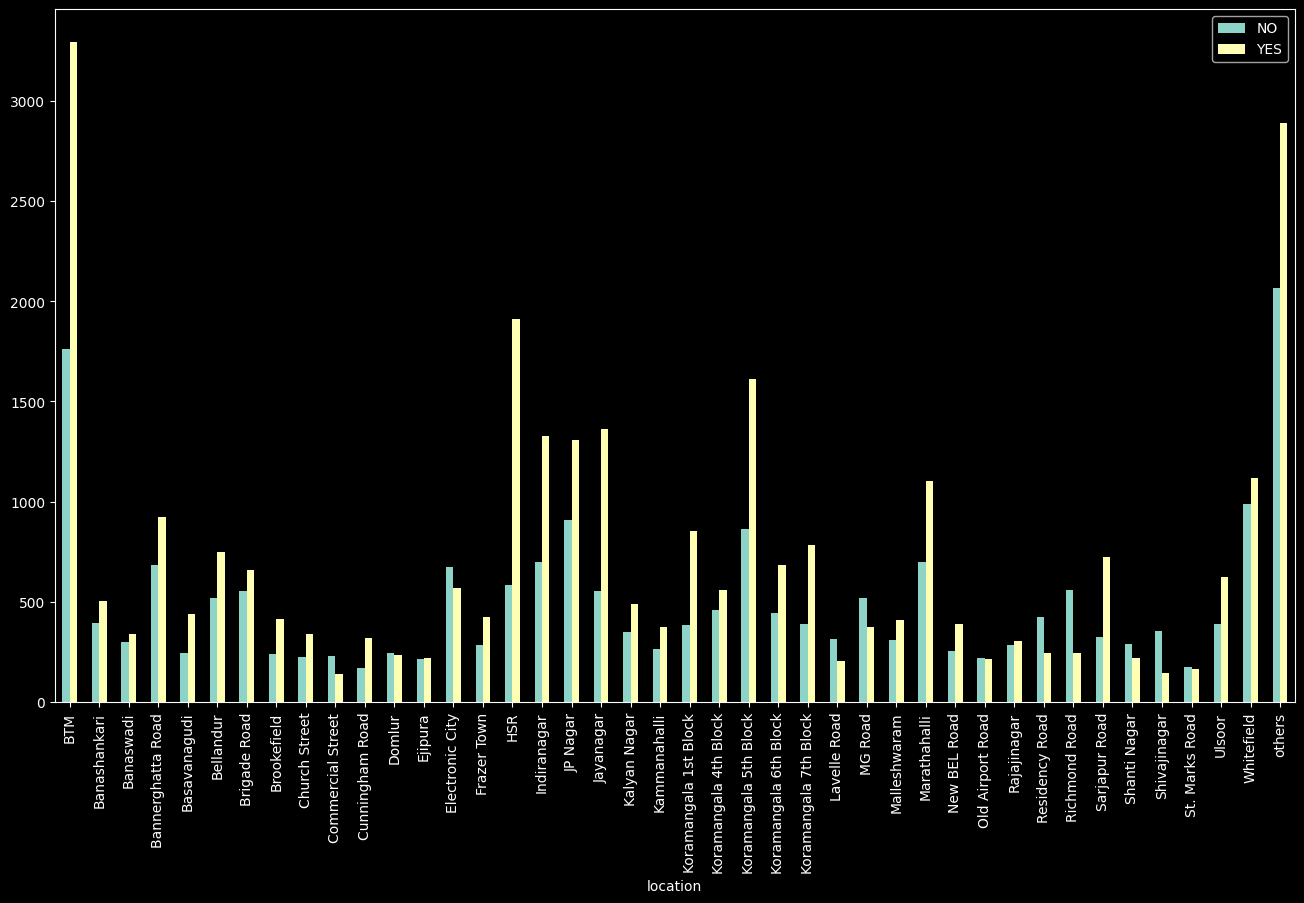

In [43]:
df1.plot(kind = "bar" , figsize = (16,9))
plt.legend(["NO" , "YES"])
plt.show()

##### Interpretation : The above plot shows that in the locations such as BTM , HSR , Marathahalli and more , most of the restaurants are offering online order facility but in the locations such as Electronic city , Lavelle Road , Residency Road , Shivaji Nagar only few retaurants are offering online order facility , so for the profit it is beneficial to open new restaurants at these locations where there is shortage of online order facility.

#### Visualizing restaurants offering book table facility Location wise

In [44]:
## Visualizing book table facility Location wise 
df2 = df.groupby(["location" , "book_table"])["name"].count()
df2.to_csv("location_book_table.csv")
df2 = pd.read_csv("location_book_table.csv")
df2 = pd.pivot_table(df2 , values = None , index = ["location"] , columns = ["book_table"] , aggfunc=np.sum)
df2

C:\Users\sahan\AppData\Local\Temp\ipykernel_8208\187005301.py:5: FutureWarning: The provided callable <function sum at 0x000002BF9536C4A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2 , values = None , index = ["location"] , columns = ["book_table"] , aggfunc=np.sum)


name       
book_table                 No    Yes
location                            
BTM                    4889.0  167.0
Banashankari            839.0   63.0
Banaswadi               632.0    8.0
Bannerghatta Road      1510.0   99.0
Basavanagudi            668.0   16.0
Bellandur              1170.0   98.0
Brigade Road           1034.0  176.0
Brookefield             582.0   74.0
Church Street           385.0  181.0
Commercial Street       370.0    NaN
Cunningham Road         315.0  175.0
Domlur                  427.0   55.0
Ejipura                 433.0    NaN
Electronic City        1148.0   98.0
Frazer Town             706.0    8.0
HSR                    2277.0  217.0
Indiranagar            1578.0  448.0
JP Nagar               1903.0  315.0
Jayanagar              1637.0  279.0
Kalyan Nagar            692.0  149.0
Kammanahalli            590.0   49.0
Koramangala 1st Block  1186.0   50.0
Koramangala 4th Block   695.0  322.0
Koramangala 5th Block  1787.0  692.0
Koramangala 6th Block  1015.0  112.0
Koramangala 7th Block  1012.0  162.0
Lavelle Road            290.0  228.0
MG Road                 546.0  347.0
Malleshwaram            632.0   89.0
Marathahalli           1642.0  163.0
New BEL Road            588.0   56.0
Old Airport Road        378.0   59.0
Rajajinagar             550.0   41.0
Residency Road          522.0  149.0
Richmond Road           687.0  116.0
Sarjapur Road           893.0  154.0
Shanti Nagar            451.0   57.0
Shivajinagar            475.0   23.0
St. Marks Road          219.0  124.0
Ulsoor                  834.0  177.0
Whitefield             1852.0  253.0
others                 4587.0  367.0

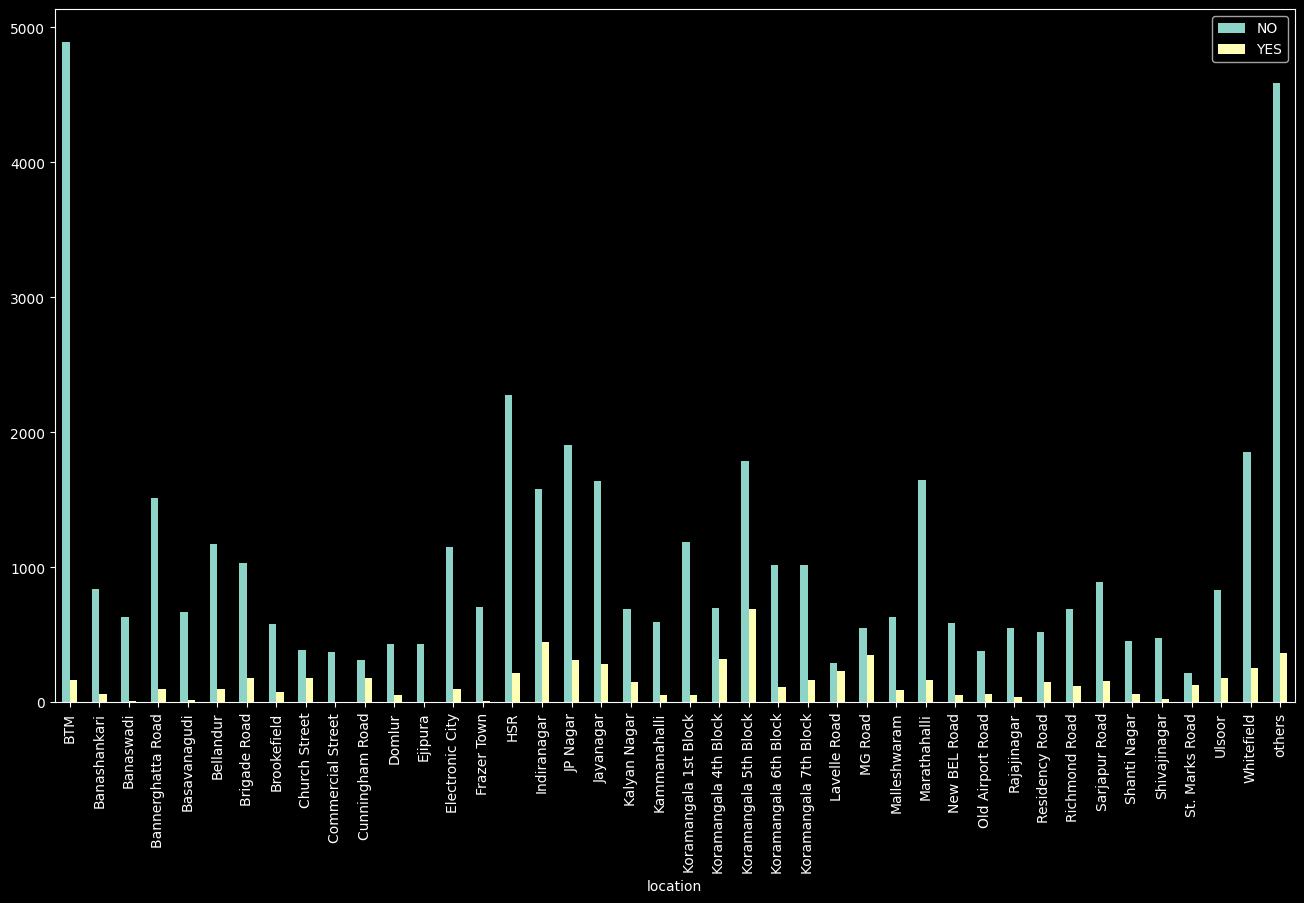

In [45]:
df2.plot(kind = "bar" , figsize = (16,9))
plt.legend(["NO" , "YES"])
plt.show()

##### Interpretation : From above plot we can conclude at all the locations , the restaurants that are offering book table facility are less as compared to restaurants that doesn't offers book table facility , so if a person want to open a new restaurant , so he/she can open new outlet at any of the locations and offers book table facility to maximize profit.

#### Visualizing Types of Restaurants v/s Rating(rate)

C:\Users\sahan\AppData\Local\Temp\ipykernel_8208\1969641534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Type" , y = "rate" , data = df , palette= "rainbow")


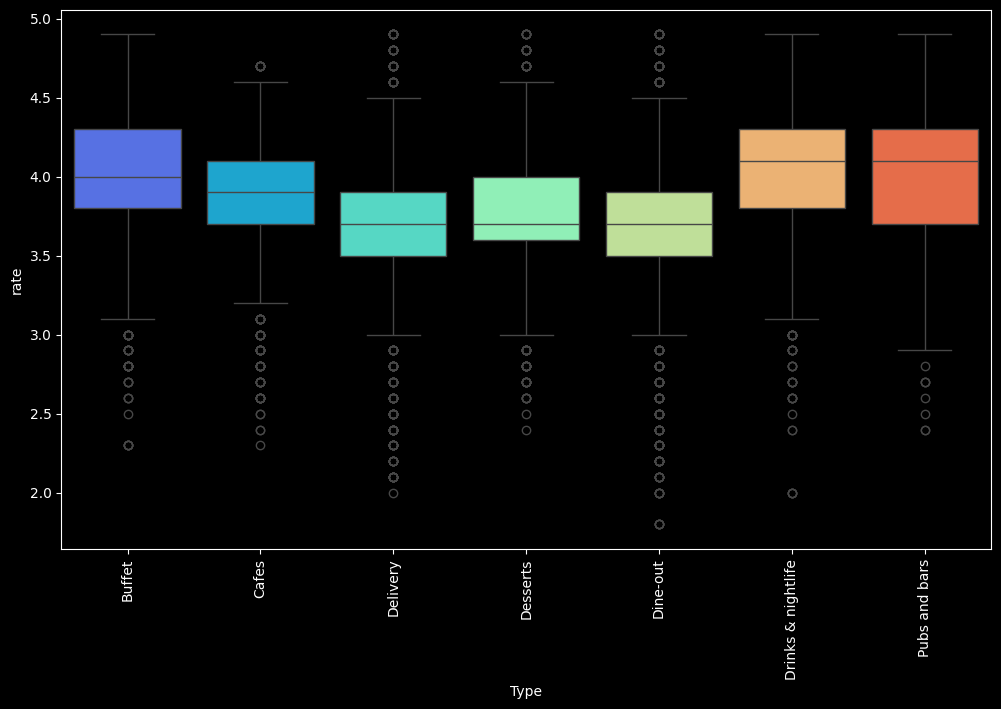

In [46]:
## Visualizing Types of Restaurants v/s Rating(rate)
plt.figure(figsize = (12,7))
sns.boxplot(x = "Type" , y = "rate" , data = df , palette= "rainbow")
plt.xticks(rotation = 90)
plt.show()

##### Interpretation : Buffets, Drinks & nightlife, and Pubs and bars generally receive higher ratings compared to Cafes, Delivery, and Dine-out options. All categories show some variability and have outliers, particularly on the lower end . To improve overall ratings, Delivery and Dine-out services should focus on consistency and quality enhancements, addressing the factors that lead to lower ratings.

#### Visualizing Types of Restaurants Location wise 

In [47]:
## Visualizing Types of Restaurants Location wise 
df3 = df.groupby(["location","Type"])["name"].count()
df3.to_csv("type_location.csv")
df3 = pd.read_csv("type_location.csv")
df3 = pd.pivot_table(df3, values = None , index = ["location"], columns = ["Type"] , aggfunc =np.sum)
df3

C:\Users\sahan\AppData\Local\Temp\ipykernel_8208\983386922.py:5: FutureWarning: The provided callable <function sum at 0x000002BF9536C4A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3, values = None , index = ["location"], columns = ["Type"] , aggfunc =np.sum)


name                                    \
Type                  Buffet  Cafes Delivery Desserts Dine-out   
location                                                         
BTM                     21.0   83.0   3053.0    198.0   1660.0   
Banashankari             7.0   36.0    418.0     71.0    356.0   
Banaswadi                NaN   24.0    310.0     37.0    262.0   
Bannerghatta Road        9.0   46.0    828.0    137.0    578.0   
Basavanagudi             7.0   11.0    344.0     66.0    251.0   
Bellandur               28.0   36.0    617.0     75.0    479.0   
Brigade Road            25.0   46.0    497.0    108.0    455.0   
Brookefield              6.0   17.0    339.0     45.0    245.0   
Church Street           19.0   51.0    193.0     29.0    215.0   
Commercial Street        NaN   13.0    121.0     77.0    159.0   
Cunningham Road         29.0   34.0    194.0     26.0    184.0   
Domlur                  15.0   13.0    261.0     35.0    135.0   
Ejipura                  NaN    NaN    245.0     16.0    172.0   
Electronic City         23.0   24.0    570.0     71.0    516.0   
Frazer Town              1.0   11.0    470.0     56.0    172.0   
HSR                     19.0   49.0   1694.0    120.0    580.0   
Indiranagar             38.0   97.0   1091.0    140.0    529.0   
JP Nagar                45.0   76.0   1151.0    166.0    722.0   
Jayanagar               27.0   77.0   1043.0    182.0    575.0   
Kalyan Nagar             9.0   45.0    366.0     88.0    315.0   
Kammanahalli             2.0   27.0    329.0     35.0    240.0   
Koramangala 1st Block    3.0   26.0    716.0     70.0    398.0   
Koramangala 4th Block   21.0   53.0    464.0     81.0    302.0   
Koramangala 5th Block   65.0  146.0   1075.0    209.0    842.0   
Koramangala 6th Block   18.0   43.0    511.0     70.0    411.0   
Koramangala 7th Block   25.0   52.0    503.0    127.0    417.0   
Lavelle Road            30.0   27.0    127.0     50.0    191.0   
MG Road                 51.0   76.0    266.0     68.0    343.0   
Malleshwaram            11.0   31.0    269.0     85.0    291.0   
Marathahalli            34.0   32.0    980.0    105.0    630.0   
New BEL Road             4.0   29.0    338.0     33.0    224.0   
Old Airport Road        12.0    5.0    200.0     35.0    164.0   
Rajajinagar             10.0    4.0    258.0     55.0    251.0   
Residency Road          20.0   31.0    187.0     63.0    289.0   
Richmond Road           63.0   21.0    257.0     78.0    356.0   
Sarjapur Road           25.0   22.0    558.0     82.0    319.0   
Shanti Nagar             9.0   22.0    198.0     39.0    229.0   
Shivajinagar             6.0   17.0    143.0     37.0    280.0   
St. Marks Road           5.0   10.0    111.0     10.0    145.0   
Ulsoor                  16.0   56.0    456.0     71.0    359.0   
Whitefield              28.0   51.0   1041.0    137.0    768.0   
others                  83.0  133.0   2787.0    276.0   1553.0   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                 22.0          19.0  
Banashankari                        14.0           NaN  
Banaswadi                            6.0           1.0  
Bannerghatta Road                    9.0           2.0  
Basavanagudi                         5.0           NaN  
Bellandur                           17.0          16.0  
Brigade Road                        57.0          22.0  
Brookefield                          4.0           NaN  
Church Street                       36.0          23.0  
Commercial Street                    NaN           NaN  
Cunningham Road                     16.0           7.0  
Domlur                              12.0          11.0  
Ejipura                              NaN           NaN  
Electronic City                     21.0          21.0  
Frazer Town                          2.0           2.0  
HSR                        

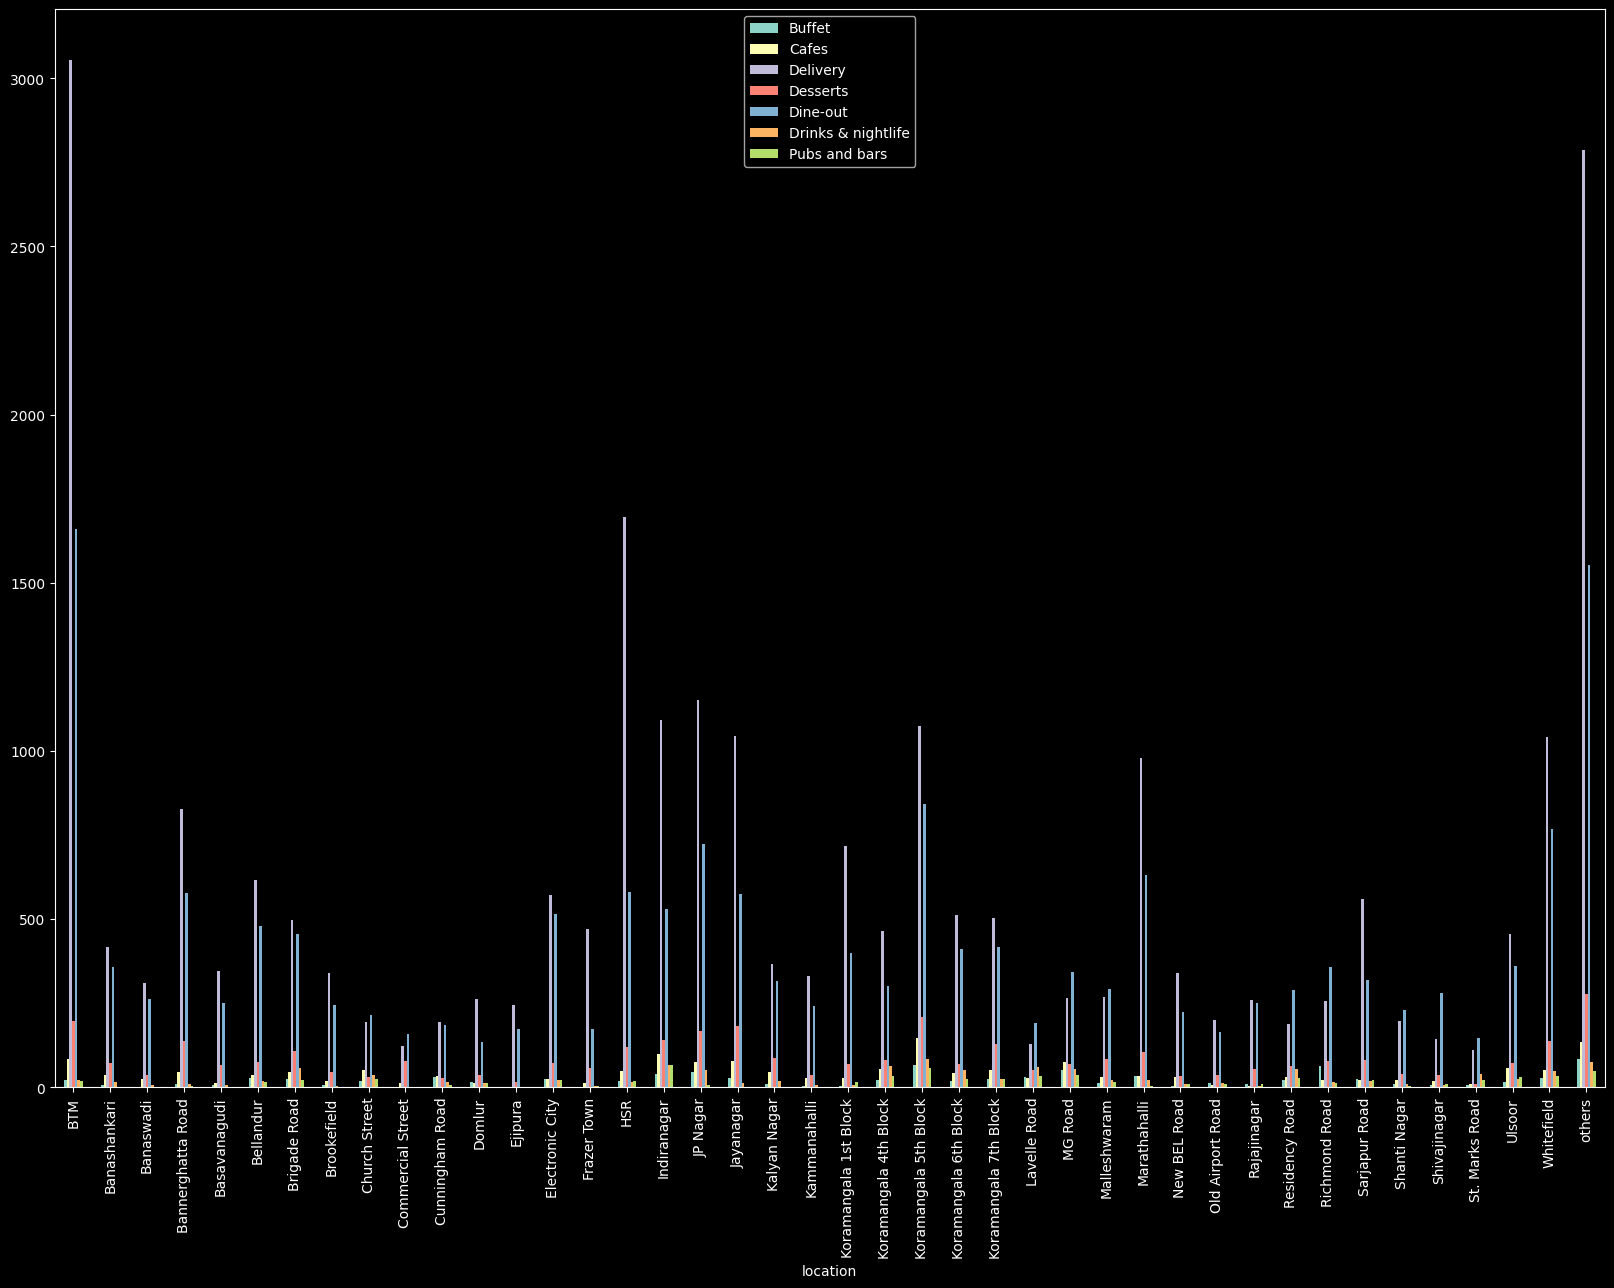

In [48]:
df3.plot(kind = "bar" , figsize = (20,14))
plt.legend(["Buffet","Cafes","Delivery","Desserts","Dine-out","Drinks & nightlife","Pubs and bars"])
plt.show()

##### Interpretation : Dine-out and delivery options are the most prevalent across locations, with Koramangala and Indiranagar leading in overall establishment count. 

#### Top - 10 voting locations 

In [49]:
## Top - 10 voting locations  
location_wise_vote_count = df.groupby(["location"])["votes"].sum().sort_values(ascending = False).head(10)
location_wise_vote_count

location
Koramangala 5th Block    2214083
Indiranagar              1165909
Koramangala 4th Block     685156
Church Street             590306
JP Nagar                  586522
BTM                       573668
others                    563807
HSR                       498322
Lavelle Road              495777
Koramangala 7th Block     488225
Name: votes, dtype: int64

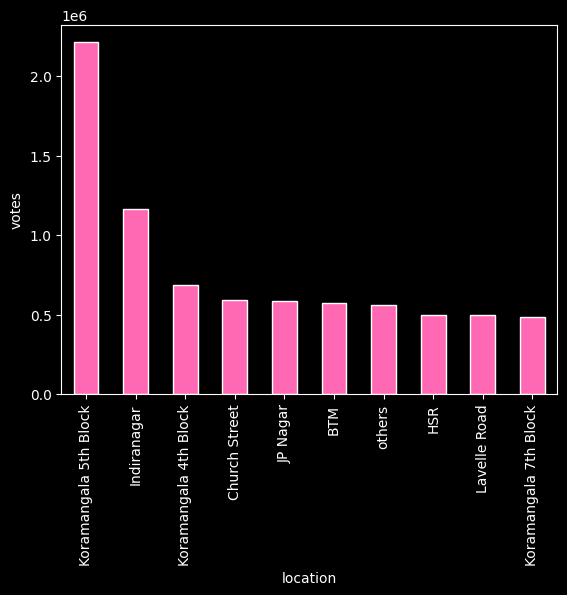

In [50]:
location_wise_vote_count.plot(kind = 'bar', color = "hotpink" , edgecolor = "white")
plt.xlabel("location")
plt.ylabel("votes")
plt.show()

##### Interpretation : Koramangala 5th Block is the most popular location, followed by Indiranagar.Focus marketing and expansion efforts on these top-performing areas.

#### Top - 10 Cuisines voting

In [51]:
## Top - 10 Cuisines(technique of cooking) voting 
cuisines = df.groupby(["cuisines"])["votes"].sum().sort_values(ascending = False).head(10)
cuisines

cuisines
others                        11542182
North Indian                    516310
North Indian, Chinese           258225
South Indian                    161975
North Indian, Mughlai           103706
Chinese                         101728
Cafe                             89986
North Indian, South Indian       88925
Desserts                         84323
Chinese, Momos                   82796
Name: votes, dtype: int64

In [52]:
cuisines = cuisines.drop("others")

In [53]:
cuisines

cuisines
North Indian                  516310
North Indian, Chinese         258225
South Indian                  161975
North Indian, Mughlai         103706
Chinese                       101728
Cafe                           89986
North Indian, South Indian     88925
Desserts                       84323
Chinese, Momos                 82796
Name: votes, dtype: int64

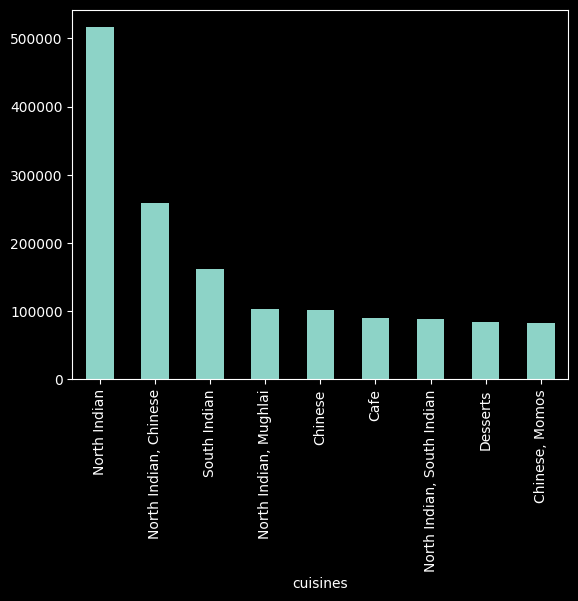

In [54]:
cuisines.plot(kind = "bar")
plt.show()

##### Interpretation : North Indian cuisine is the most popular, followed by North Indian and Chinese.Increase focus on North Indian cuisine, potentially offering variations or specialties. Explore combining North Indian and Chinese elements for new dishes.